# RAG Workshop
**Décembre 2024**

<img src="img/profil.png" alt="Profil Image" style="height:200px;">
<br>

**Julien Baudru, PhD Student**, sujet de recherche : *Système de covoiturage équitable dans les grands réseaux routiers multimodaux*


<img src="img/paper1.png" alt="Paper" style="height:400px;">
<img src="img/paper2.png" alt="Paper" style="height:400px;">

https://www.researchgate.net/profile/Julien-Baudru/research

<img src="img/iridia.png" alt="IRIDIA" style="height:100px;">

https://github.com/iridia-ulb

<img src="img/fari.webp" alt="FARI" style="height:100px;">

https://www.fari.brussels/research-and-innovation/publications

## Introduction

### Que sont les LLMs ?
LLM signifie Language Model, ou Modèle de Langage. Il s'agit d'un modèle d'intelligence artificielle conçu pour comprendre et générer du texte de manière semblable à l'humain.

On peut considérer les LLM comme des "perroquets stochastiques" capables de produire du texte en fonction des entrées reçues. Ils sont entraînés sur de vastes corpus de données textuelles et apprennent les structures et motifs du langage humain.

Les grands modèles de langage (LLM) apprennent les propriétés statistiques de la langue en prédisant le mot suivant dans une séquence, basé sur le contexte des mots précédents.

#### Tokenisation

Les tokens sont des unités de texte atomiques, telles que des mots, sous-mots ou caractères, séparés par des espaces ou des signes de ponctuation, utilisés comme blocs de construction fondamentaux pour les tâches de traitement du langage naturel.

<img src="img/token.png" alt="Token Image" style="height:200px;">


https://observablehq.com/@simonw/gpt-tokenizer


#### Représentations vectorielles (embeddings)

Les embeddings sont des représentations vectorielles denses de mots ou de tokens, qui capturent la signification sémantique des mots, où les mots similaires sont plus proches les uns des autres.

<img src="img/embeddings2.webp" alt="Embeddings 2 Image" style="height:400px;">

https://arize.com/blog-course/embeddings-meaning-examples-and-how-to-compute/


<img src="img/embeddings.png" alt="Embeddings Image" style="height:600px;">

https://projector.tensorflow.org/



#### Architecture du *Transformer*
La plupart des modèles de language actuels sont basés sur l'architecture du transformateur, qui est un modèle d'apprentissage profond conçu pour traiter des données séquentielles, telles que du texte.

L'architecture de transformateur est composée d'un encodeur et d'un décodeur. 
L'encodeur traite la séquence d'entrée et génère une représentation de l'entrée, les embeddings d'entrée. Le décodeur prend les embeddings de sortie et génère la séquence de sortie.

Sans doute l'article le plus influent en IA de ces dernières années (Google Brain, 2017): https://papers.neurips.cc/paper/7181-attention-is-all-you-need.pdf

<img src="img/transformer.png" alt="Transformer Image" style="height:500px;">

https://jalammar.github.io/illustrated-transformer/


### Limites des LLMs
Avant **gpt4o**, la principale limite des LLMs est qu'ils **ne étaient pas en mesure d'accéder à des informations externes**. 
Cela signifie qu'ils ne pouvaient générer du texte qu'à partir des données sur lesquelles ils ont été entrainé. 

Maintenant **gpt4o** peut accéder à des informations d'internet pour générer du texte, mais une limite persiste : 

Les LLMs peuvent générer un texte qui n'est pas précis ou fiable. 
En effet, ils sont formés à partir d'un vaste corpus de données textuelles, et ces modèles tenteront de générer du texte même s'ils ne disposent pas des informations nécessaires pour le faire de manière précise. 
Ils répondent avec le plus proche texte qu'ils ont vu lors de l'entraînement, ce text est statistiquement probable mais pas forcément correct.

Nous appelons ce problème **"hallucination"**.

Cela peut poser un problème dans les scénarios où des informations précises et actualisées sont cruciales, par exemple dans les domaines:
- juridique
- médical
- service client

### Retrieval-Augmented Generation (RAG) pour les models LLM

**Retrieval-Augmented Generation (RAG)**  est une technique d'IA qui combine la recherche d'informations et la génération de texte. 

Cette approche améliore la précision et la fiabilité du contenu généré par l'IA en le fondant sur des informations pertinentes et actualisées provenant de sources externes, souvent des documents ou des bases de données spécialisées.

<img src="img/framework_1.png" alt="Framework Image" style="height:300px;">

https://pub.towardsai.net/rag-explained-key-component-in-large-language-model-llm-e9b8e2083a45



#### Exemple d'utilisation de RAG

**Gestion des données internes**

In [ ]:
from IPython.display import Video

Video("img/demo_rag.mp4")

### RAG vs Fine-Tuning

Une autre approche pour améliorer les performances des LLMs est le fine-tuning, qui consiste à entraîner un modèle pré-entraîné sur des données spécifiques à une tâche.

Cependant, le fine-tuning peut être coûteux en termes de temps et de ressources, et limite la capacité du modèle, il ne pourra pas être utilisé pour des tâches pour lesquelles il n'a pas été entraîné.

Le RAG, en revanche, permet d'accéder à des informations externes sans nécessiter de ré-entraînement du modèle, ce qui le rend plus flexible, moins coûteux et adaptable à une variété de tâches et de domaines.


## Installation

Pour cet atelier, nous utiliserons **Jupyter Notebook**. Il vous permet d'inclure du texte et des images dans votre code, ce qui facilite la création de documents interactifs et informatifs. Prêt à commencer ?

### Python

Installez *Python3.10* en le téléchargeant depuis le site officiel : https://www.python.org/downloads/.

Pour ce workshop, nous aurons besoin des bibliothèques Python suivantes :
    
```bash
openai
transformers
sentence-transformers
numpy
InstructorEmbedding
faiss-cpu
matplotlib
sklearn
```

Ici nous n'utiliserons pas [LangChain](https://github.com/langchain-ai/langchain) par soucis de simplicité et pour vous permettre de comprendre en détail comment fonctionne l'architecture RAG.

Vous pouvez les installer en utilisant la commande suivante :

In [68]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## LLM Model

Pour cet atelier, nous utiliserons le **modèle OpenAI gpt-3.5-turbo**, mais vous pouvez utiliser n'importe quel autre modèle LLM, comme [Claude Sonnet from Anthropic](https://www.anthropic.com/news/claude-3-5-sonnet) ou [Llama from Meta](https://huggingface.co/docs/transformers/main/en/model_doc/llama) par exemple.
Pour utiliser GPT-4o dans cet atelier, vous devrez créer une clé API sur OpenAI :
- Commencez par visiter la plateforme OpenAI à l'adresse https://platform.openai.com/signup. Si vous n'avez pas de compte, inscrivez-vous à l'aide de votre adresse électronique ou connectez-vous si vous en avez déjà un. 
- Une fois connecté, cliquez sur l'icône de votre profil dans le coin supérieur droit, puis sélectionnez « API Keys » dans le menu déroulant.
- Pour générer une nouvelle clé API, cliquez sur *Create new secret key* sur la page Clés API. Copiez la clé, car elle ne sera affichée qu'une seule fois, et conservez-la en lieu sûr. 

Si vous n'êtes pas en mesure de créer une clé API sur OpenAI, vous pouvez utiliser ma clé API pour la suite de l'atelier.

Notez qu'il est également possible de mettre en place un modèle localement sur votre machine en utilisant des modèles Hugging Face, mais cela nécessite plus de ressources et de temps. Je vous conseille notamment de tester [llama.cpp](https://github.com/ggerganov/llama.cpp)


## Demander quelque chose au modèle

Pour tester si tout est installé correctement, exécutez le code suivant :

In [ ]:
import openai

# Set your API key
openai.api_key = ""
def ask_LLM(question):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or another model like "gpt-4o"
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": question}
        ],
        max_tokens=3000
    )
    return response.choices[0].message['content'].strip()

In [70]:
question = "Who is the director of the Helha school in Tournai?"
response = ask_LLM(question)
print(response)

The director of the Helha school in Tournai is Mireille Flammia.


In [71]:
question = "What is Helha Tournai's annual budget for equipment?"
response = ask_LLM(question)
print(response)

I apologize, but I do not have access to real-time or specific information regarding Helha Tournai's annual budget for equipment. I recommend contacting Helha Tournai directly or visiting their official website for the most up-to-date information on their budget allocation for equipment.


In [72]:
question = "How can I sign up to be a volunteer at the Paris 2024 Olympic Games?"
response = ask_LLM(question)
print(response)

To sign up as a volunteer for the Paris 2024 Olympic Games, you can follow these steps:

1. Visit the official Paris 2024 Olympic Games website.
2. Look for the "Volunteers" or "Join Us" section on the website.
3. Fill out the volunteer application form with your personal details and preferences.
4. Submit the form and wait for a confirmation email or further instructions from the organizing committee.
5. Stay updated on any news or updates related to the volunteer program through the official channels.

Additionally, you may also reach out to the Paris 2024 Olympic Games organizers directly through their contact information on the website for any specific inquiries or assistance in signing up as a volunteer.


Comme vous pouvez le constater, le modèle répond souvent de manière évasive, en disant qu'il n'est pas en mesure de fournir des informations en temps réel ou qu'il n'a tout simplement pas assez de contexte pour répondre.

## Calculer quelques embeddings
Maintenant que notre modèle est en place, calculons quelques embeddings pour quelques phrases. Nous allons utiliser la bibliothèque `InstructorEmbedding` pour générer des embeddings pour les phrases.


In [73]:
from InstructorEmbedding import INSTRUCTOR

model_instructor = INSTRUCTOR('hkunlp/instructor-large', device='cpu')  # you can use GPU

def compute_embeddings(text, model):
    query_aux = [['Represent the sentence for topic clustering.',
                text]]
    embedding = model.encode(query_aux)
    return embedding


load INSTRUCTOR_Transformer
max_seq_length  512


In [74]:
texts = ["cat", "dog", "horse", "animal", "banana", "apple", "mango", "fruit"]
embeddings = []
for text in texts:
    embedding = compute_embeddings(text, model_instructor)
    embeddings.append(embedding)
    
print(embeddings)

[array([[-2.70210020e-02, -7.40831299e-03, -3.30829085e-03,
         3.42554115e-02,  2.92341337e-02,  2.40100529e-02,
        -2.98978831e-03, -2.76356982e-03, -5.25335819e-02,
         2.50464194e-02,  5.79965040e-02, -1.23242075e-02,
         3.15589346e-02,  1.21308863e-02, -4.67720255e-02,
         1.00136199e-03, -5.10946214e-02, -2.06464739e-03,
        -3.53985801e-02, -2.56721973e-02,  4.20989990e-02,
         5.63609973e-03, -3.51715423e-02,  6.28059506e-02,
        -1.23403892e-02,  3.55389155e-02, -3.17456597e-03,
         3.98901664e-02,  4.73191440e-02, -5.50875552e-02,
         4.88521904e-02, -4.51821834e-02, -3.97456661e-02,
        -3.47266085e-02, -5.92670869e-03,  6.45260140e-02,
         2.34260131e-02,  3.53305042e-02, -9.96920746e-04,
         4.67391759e-02, -4.01170133e-03, -4.57226811e-03,
        -2.30068713e-02, -2.36918572e-02, -1.08653996e-02,
         3.98881659e-02, -2.11125202e-02, -3.12775411e-02,
        -4.60808910e-03, -1.15441699e-02, -6.59621060e-

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import cm

def plot_embeddings_2D(embeddings, texts):
    # Convert embeddings to a NumPy array
    embeddings_array = np.vstack(embeddings)

    # Dynamically set the perplexity value
    n_samples = embeddings_array.shape[0]
    perplexity = min(2, n_samples - 1)

    # Apply t-SNE to reduce dimensions to 2D
    tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
    embeddings_2d = tsne.fit_transform(embeddings_array)

    # Create a color map based on the 2D embeddings
    norm = plt.Normalize(embeddings_2d[:, 0].min(), embeddings_2d[:, 0].max())
    colors = cm.viridis(norm(embeddings_2d[:, 0]))

    # Plot the 2D embeddings
    plt.figure(figsize=(10, 8))
    plt.gca().set_facecolor('lightgrey')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors, s=50, alpha=0.7, edgecolors='w', linewidth=0.5)
    
    for i, txt in enumerate(texts):
        plt.annotate(txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=8, ha='right')

    plt.title('2D Embeddings Visualization', fontsize=14)
    plt.xlabel('Dimension 1', fontsize=12)
    plt.ylabel('Dimension 2', fontsize=12)
    plt.show()

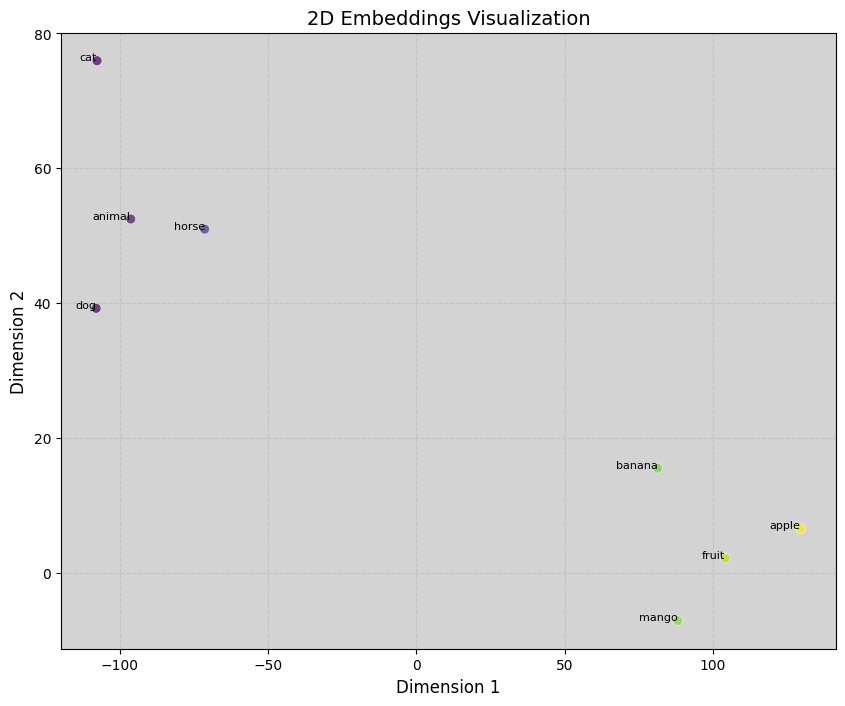

In [76]:
plot_embeddings_2D(embeddings, texts)

Nous allons maintenant prendre un exemple plus complexe, au lieu d'intégrer un simple mot ou une phrase, nous allons intégrer un ensemble de documents.

Pour cet atelier, nous utiliserons l'ensemble de données FAQ des Jeux olympiques de Paris 2024. Cet ensemble de données contient des informations relatives à l'engagement des supporters, à la démographie, à la vente de billets et à la fréquentation des événements pendant les Jeux olympiques d'été de 2024 à Paris.

https://www.kaggle.com/datasets/sahityasetu/paris-2024-olympics-faq

Cet ensemble de données est composé de 82 documents triés par thème.

En production, ces informations seront stockées dans une base de données vectorielle, par exemple [MongoDB](https://github.com/mongodb/mongo), ou [autres](https://en.wikipedia.org/wiki/Vector_database).


In [77]:
import os
import glob

def embed_text_files(file_paths, model):
    embeddings = []
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
            embedding = compute_embeddings(text, model)
            embeddings.append(embedding)
    return embeddings

file_paths = glob.glob(os.path.join('data/jo', '*.txt'))

doc_embeddings = embed_text_files(file_paths, model_instructor)
print(len(doc_embeddings))

82


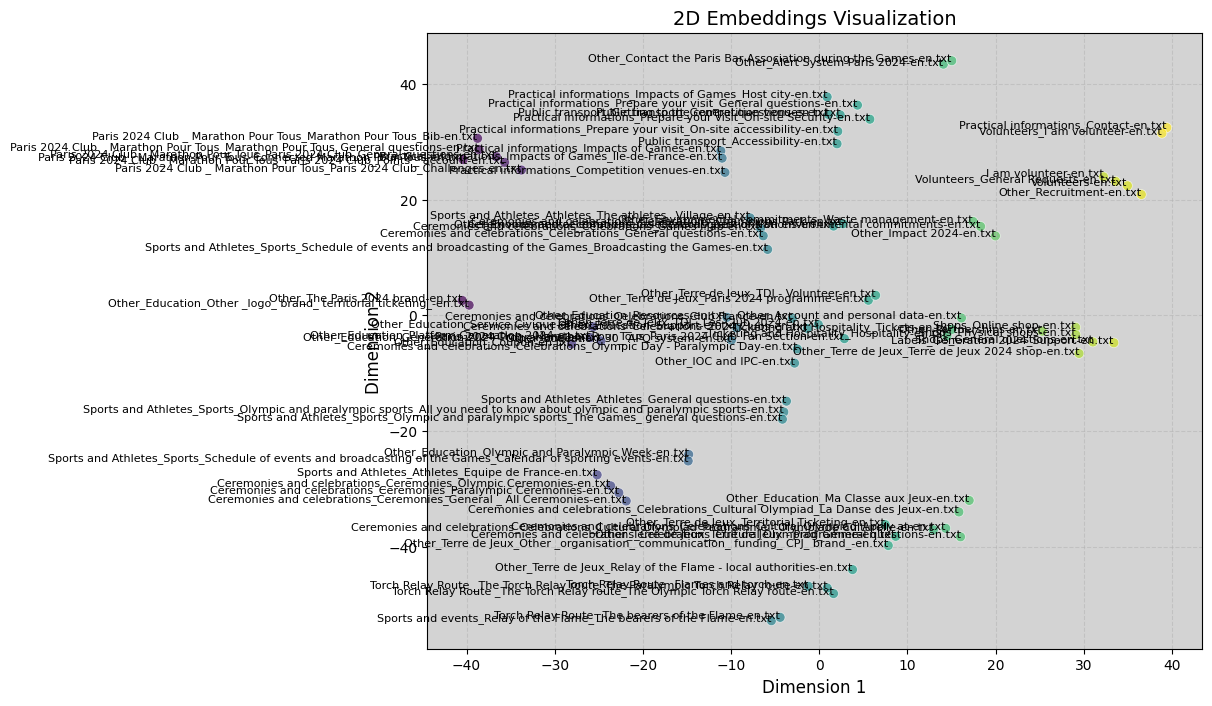

In [78]:
doc_names = [os.path.basename(file_path) for file_path in file_paths]
plot_embeddings_2D(doc_embeddings, doc_names)

Une autre technique consiste à relier les phrases de chaque document entre elles selon leurs relations pour former une structure de données qu'on appelle un **Knowledge Graph**. 

<img src="img/knowledge-graph-2.png" alt="Knowledge graph" style="height:300px;">

https://www.leewayhertz.com/knowledge-graph-in-machine-learning/

## Récupérer des informations pertinentes

Maintenant que nous avons nos enchâssements, nous pouvons les utiliser pour extraire des informations pertinentes d'une base de connaissances. Nous utiliserons la similarité entre les embeddings des phrases d'entrée et les embeddings de la base de connaissances pour trouver l'information la plus pertinente.

Pour ce faire, nous utiliserons la bibliothèque `faiss-cpu`, qui est une bibliothèque pour la recherche de similarité efficace et le regroupement de vecteurs denses.

Tout d'abord, nous devons **embed** la requête de l'utilisateur.

In [79]:
user_query = "How can I sign up to be a volunteer at the Paris 2024 Olympic Games?"

user_query_embedding = compute_embeddings(user_query, model_instructor)
print(user_query_embedding)

[[-3.79199535e-02 -4.08359170e-02 -1.19895050e-02  3.69977904e-03
   4.96589094e-02 -1.17672677e-03  4.37146286e-03  2.45376341e-02
  -3.92823517e-02  2.13643350e-02  8.19044095e-03  1.02107897e-02
   4.73946668e-02  2.60399748e-02 -4.32985313e-02 -2.11172681e-02
  -3.04404199e-02 -4.05000011e-03 -1.44198760e-02 -1.51569331e-02
   7.59601817e-02  1.75951011e-02 -5.57900826e-03  2.47826278e-02
   3.54453223e-03 -1.63147040e-02 -2.54546590e-02  3.99994552e-02
   3.71771455e-02 -5.58860637e-02  1.26951085e-02 -2.27123778e-02
  -3.10137440e-02 -4.69435081e-02  2.34251493e-03 -2.49229744e-02
  -5.26885269e-03  5.28431032e-03  1.54018216e-02  1.09085748e-02
  -3.49694677e-02  2.63469815e-02  1.20268492e-02 -1.98042430e-02
   1.57928746e-02 -7.64020067e-03 -2.06391551e-02 -5.59151545e-02
   1.36798304e-02 -5.26877940e-02 -3.67454402e-02 -5.09935282e-02
  -2.42311414e-02 -2.14636559e-03  2.32790448e-02 -9.59496759e-03
  -4.88750897e-02 -6.71077659e-03  7.13323057e-02 -5.04751764e-02
  -7.48450

In [80]:
# compute the similarity between the user query and each document using Faiss
import faiss
import numpy as np

def search_faiss(query_embedding, doc_embeddings, doc_names, k=10):
    # Convert the embeddings to a NumPy array
    embeddings_array = np.vstack(doc_embeddings)

    # Initialize the Faiss index
    index = faiss.IndexFlatIP(embeddings_array.shape[1])

    # Add the document embeddings to the index
    index.add(embeddings_array)

    # Ensure the query embedding is a 2D array
    query_embedding = np.array(query_embedding).reshape(1, -1)

    # Search the index for the nearest neighbors
    distances, indices = index.search(query_embedding, k)
    
    # Get the names of the closest documents
    closest_docs = [doc_names[i] for i in indices[0]]
    closest_dist = [distances[0][i] for i in range(len(distances[0]))]
    return closest_dist, closest_docs


In [93]:
def cosine_similarity(embedding1, doc_embeddings, doc_names, k=10):
    similarities = []
    for embedding2 in doc_embeddings:
        similarity = np.dot(embedding1, embedding2.T) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
        similarities.append(similarity)
        
    # Get the indices of the top k most similar documents
    indices = np.argsort(similarities)[::-1][:k]
    
    # Get the names of the closest documents
    closest_docs = [doc_names[i] for i in indices]
    closest_sim = [similarities[i] for i in indices]
    return closest_sim, closest_docs
    

In [82]:
closest_dist, closest_docs = search_faiss(user_query_embedding, doc_embeddings, doc_names)
print(closest_docs)
print(closest_dist)

['Volunteers_General Requests-en.txt', 'I am volunteer-en.txt', 'Other_Terre de Jeux_TDJ - Volunteer-en.txt', 'Volunteers-en.txt', 'Practical informations_Prepare your visit_General questions-en.txt', 'Ceremonies and celebrations_Celebrations_2024 Clubs-en.txt', 'Public transport_Getting to the competition venues-en.txt', 'Ceremonies and celebrations_Celebrations_Cultural Olympiad_Apply at-en.txt', 'Ceremonies and celebrations_Celebrations_Games Map-en.txt', 'Other_Education_Support-en.txt']
[0.93680686, 0.9148823, 0.9006592, 0.8986738, 0.89176583, 0.8898894, 0.8876424, 0.8874482, 0.88561785, 0.8829181]


Nous pouvons maintenant utiliser le document le plus proche de la requête de l'utilisateur pour générer une réponse.

Notez aussi que cette réponse dépendra également du *user prompt* et du *system prompt* donnés au modèle.


In [95]:
# read content of a text file
def read_text_files(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

In [96]:
closest_docs_content = read_text_files("data/jo/" + closest_docs[0])
print(closest_docs_content)

Onj4S_sx-en; en; Can I apply for the Paris 2024 volunteers programme?; The deadline for applying to the Paris 2024 volunteering programme has already passed.

However, there are alternative ways to experience the excitement of the Paris 2024 Games!



Keep yourself informed and engaged by becoming a member of Paris 2024 Club:

https://club.paris2024.org/en/home



For more information, please visit:

https://www.paris2024.org/en/volunteers/; Volunteers;General Requests; https://help.paris2024.org/en-gb/contents/Can-I-apply-for-the-Paris-2024-volunteers-programme-Onj4S_sx
r5OTAM9d-en; en; What is the Olympic volunteering charter?; The Olympic and Paralympic volunteering charter sets out the missions, rights, duties and guarantees of volunteers taking part in the Paris 2024 Games.

It is a document produced by Paris 2024, in collaboration with the French government.

Discover the charter here [https://medias.paris2024.org/uploads/2023/03/Paris2024_Volunteers_Charter.pdf].



For more inf

Nous ajoutons le contenu de ce document à la requête de l'utilisateur dans le contexte du modèle.

In [97]:
context = user_query + "\n Reply based on the following data:\n" + closest_docs_content
rag_response = ask_LLM(context)
print(rag_response)

The deadline for applying to the Paris 2024 volunteering programme has already passed. However, you can still experience the excitement of the Paris 2024 Games by becoming a member of Paris 2024 Club. Stay informed and engaged by joining the club here: [https://club.paris2024.org/en/home].

If you are interested in learning more about the Olympic and Paralympic volunteering charter, you can discover the charter document produced by Paris 2024 in collaboration with the French government here: [https://medias.paris2024.org/uploads/2023/03/Paris2024_Volunteers_Charter.pdf].

In 2024, there will be 45,000 volunteers taking part in the great adventure of the Olympic and Paralympic Games! The volunteers' mission is to make the Games experience unique for everyone involved. Volunteers will have various responsibilities, such as welcoming spectators, guiding them around venues, or assisting with sporting gestures like picking up balls and setting up starting blocks.

The ambassadors of the Par

Nous pouvons maintenant observer que la réponse du modèle est plus pertinente et plus précise, car elle est basée sur les informations extraites de la base de connaissances. Cela permet de générer des informations actualisées, de donner des urls et de réduire les hallucinations.

## Image embeddings

Nous pouvons également créer des vecteurs de valeurs pour des éléments autres que du texte, tels que des images.

In [98]:
import os
from PIL import Image

from sentence_transformers import SentenceTransformer
import glob

def embed_images(image_folder):
    model = SentenceTransformer('clip-ViT-B-32')


    image_paths = glob.glob(os.path.join(image_folder, '**/*.png'), recursive=True)
    
    embeddings = []
    for img_path in image_paths:
        image = Image.open(img_path)
        embedding = model.encode(image)
        embeddings.append(embedding)
    
    return image_paths, embeddings

image_folder = 'data/images/fruits/'
images_names, embeddings = embed_images(image_folder)

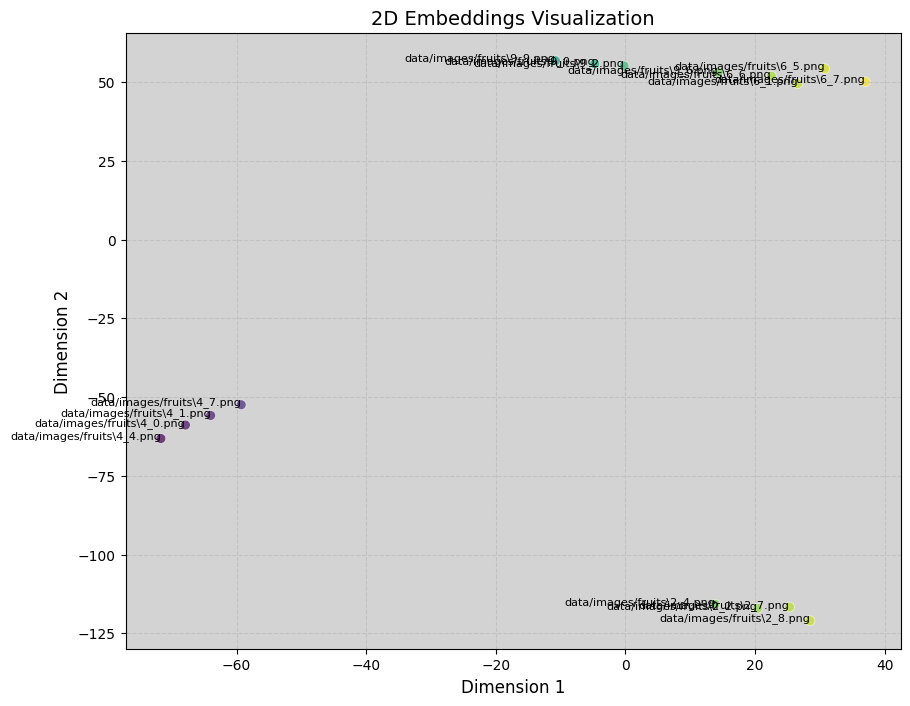

In [99]:
plot_embeddings_2D(embeddings, images_names)

In [100]:
from PIL import Image
from IPython.display import display, HTML
import base64
from io import BytesIO

def image_to_base64(image_path, size):
    img = Image.open(image_path)
    img = img.resize(size)
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

def show_images(ref_image, image_paths, size=(150, 150)):
    ref_image_base64 = image_to_base64(ref_image, size)
    images_html = f'<img src="data:image/png;base64,{ref_image_base64}" style="width:{size[0]}px;height:{size[1]}px;margin:10px;">'
    images_html += 'similar images:<br>'
    for img_path in image_paths:
        img_base64 = image_to_base64(img_path, size)
        images_html += f'<img src="data:image/png;base64,{img_base64}" style="width:{size[0]}px;height:{size[1]}px;margin:10px;">'
    
    display(HTML(f'<div style="display:flex;flex-wrap:wrap;">{images_html}</div>'))


([113.88997, 107.31278, 99.502884, 98.164604], ['data/images/fruits\\2_8.png', 'data/images/fruits\\2_7.png', 'data/images/fruits\\2_2.png', 'data/images/fruits\\4_7.png'])



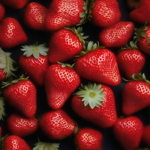
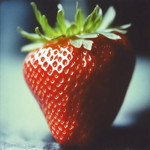
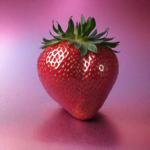
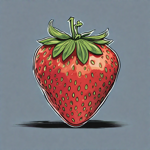
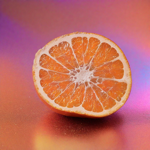

In [101]:
name, test_image_embed = embed_images("data/images/test_images/")

similar_images = search_faiss(test_image_embed, embeddings, images_names, 4)
print(similar_images)
show_images(name[0], similar_images[1])

([0.9172646, 0.861822, 0.83523077, 0.7951606], ['data/images/fruits\\2_8.png', 'data/images/fruits\\2_7.png', 'data/images/fruits\\2_2.png', 'data/images/fruits\\9_9.png'])



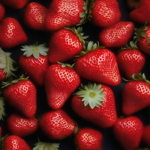
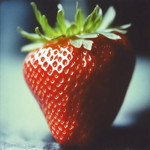
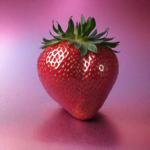
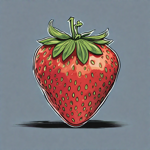
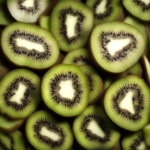

In [102]:
name, test_image_embed = embed_images("data/images/test_images/")

similar_images = cosine_similarity(test_image_embed[0], embeddings, images_names, 4)
print(similar_images)
show_images(name[0], similar_images[1])

## Conclusion

Dans cet atelier:

- Nous avons appris ce qu'étaient les modèles de langage (LLMs) et comment ils fonctionnent.

- Nous avons vu comment les LLMs peuvent être utilisés pour générer du texte et répondre à des questions.

- Nous avons découvert l'architecture RAG ainsi que ses avantages par rapport au fine-tuning.

- Nous avons également vu comment produire des embeddings pour représenter des informations textuelles et comment les utiliser pour extraire des informations pertinentes d'une base de connaissances.

- Enfin, nous avons vu comment utiliser des embeddings pour représenter d'autre type d'informations, comme des images.

### Remarque finale

Les modèles de langage sont des outils puissants pour générer du texte et répondre à des questions, mais ils peuvent être limités par leur tendance à l'hallucination. On a vu comment réduire ce phénomène en utilisant l'architecture RAG et en intégrant des informations externes dans le processus de génération de texte.

Cependant, il est important de garder à l'esprit que les modèles de langage ne sont pas parfaits et qu'ils peuvent produire des réponses incorrectes ou trompeuses. Il est donc essentiel de les utiliser avec prudence et de vérifier les informations qu'ils fournissent.

Malgré la mode actuelle des LLMs, il est important de garder à l'esprit que ces modèles ne sont pas une solution miracle et qu'ils ont leurs limites. Il est bon de rappeler que le domaine de recherche en IA existe depuis des décennies.

En 1943, Warren Sturgis McCulloch et Walter Pitts publient [« A Logical Calculus of the Ideas Immanent in Nervous Activity »](https://link.springer.com/article/10.1007/BF02478259), la première description mathématique d'un réseau de neurones artificiels.

Les LLMs ne sont qu'une des nombreuses approches pour résoudre des problèmes de traitement du langage naturel, et ils ne sont pas toujours la meilleure solution pour tous les cas d'utilisation, ils existent d'autres types d'IA/Machine Learning (ML):
- Reinforcement Learning (RL)
- Random Forest
- Support Vector Machine (SVM)
- etc.

De plus, les LLMs et autres méthodes basées sur le deep learning sont souvent critiqués pour leur énorme consommation de ressources, que ça soit en termes de puissance de calcul ou de données.

Il est donc important de garder un esprit critique et de ne pas se laisser aveugler par les promesses de ces modèles et d'identifier les cas d'utilisation où ils peuvent être utiles et ceux où ils ne le sont pas.